In [1]:
import wandb
import pandas as pd

In [2]:
api = wandb.Api()
project="subset-search-correlation"
entity="johnny-gary"
runs = api.runs(entity + "/" + project)

In [3]:
summary_list, tags_list, name_list = [], [], []
for run in runs:
    summary_list.append(run.summary._json_dict)
    name_list.append(run.name)
    tags_list.append(run.tags)


runs_df = pd.DataFrame({
    "SUMMARY": summary_list,
    "NAME": name_list, 
    "TAGS": tags_list
    })


In [4]:
runs_df 

,SUMMARY,NAME,TAGS
0,"{'_timestamp': 1665870230, 'sst2_final_valid:a...",iconic-wave-42,"[69, correlation, fixed-roberta, google/electr..."
1,{'sst2_final_valid:accuracy': 0.85104450499545...,fearless-aardvark-41,"[69, correlation, fixed-roberta, roberta-base,..."
2,"{'loss': 0.005923607852309942, '_wandb': {'run...",exalted-spaceship-40,"[68, correlation, fixed-roberta, google/electr..."
3,"{'sst:val_acc': 0.8510445049954587, 'sst2_fina...",sunny-cosmos-39,"[68, correlation, fixed-roberta, roberta-base,..."
4,"{'model_seed': 1, 'sst2_final_test:accuracy': ...",colorful-breeze-38,"[67, correlation, fixed-roberta, google/electr..."
5,{'sst2_final_valid:accuracy': 0.85467756584922...,dauntless-pine-37,"[67, correlation, fixed-roberta, roberta-base,..."
6,"{'_step': 2008, '_runtime': 166, 'run_time': 1...",pious-terrain-36,"[66, correlation, fixed-roberta, google/electr..."
7,"{'loss': 6.666526314802468e-05, '_wandb': {'ru...",clean-resonance-35,"[66, correlation, fixed-roberta, roberta-base,..."
8,"{'run_time': 201.91, '_timestamp': 1665868376,...",honest-sponge-34,"[65, correlation, fixed-roberta, google/electr..."
9,"{'_runtime': 288, 'run_time': 284.94, 'sst:val...",confused-pine-33,"[65, correlation, fixed-roberta, roberta-base,..."


In [12]:
SEEDS = [42] + list(range(50, 70))

In [20]:
from typing import Tuple, List

def get_test_accs_for_all_seeds(train_size: int, seeds: List[int]) -> Tuple[List[int], List[int]]:
    roberta_test_accs = {}
    electra_test_accs = {}
    for row in runs_df.iterrows():
        tags = set(row[1].TAGS)
        test_acc = row[1].SUMMARY['sst2_final_test:accuracy']
        seed = int(row[1].TAGS[0])
        if f"fixed-roberta" in tags and "correlation" in tags:
            if "roberta-base" in tags: 
                roberta_test_accs[seed] = test_acc
            elif "google/electra-small-discriminator" in tags: 
                electra_test_accs[seed] = test_acc
    roberta_test_accs_list = [roberta_test_accs[i] for i in seeds]
    electra_test_accs_list = [electra_test_accs[i] for i in seeds]
    return roberta_test_accs_list, electra_test_accs_list

spearman: SpearmanrResult(correlation=-0.17213381875702438, pvalue=0.45560041276966)


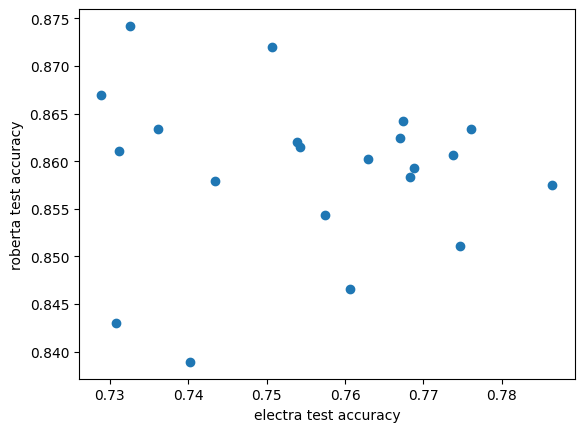

In [23]:
import scipy.stats
import matplotlib.pyplot as plt
for TRAIN_SIZE in (500,):
    roberta_test_accs_list, electra_test_accs_list = get_test_accs_for_all_seeds(train_size=TRAIN_SIZE, seeds=SEEDS) 
    x = electra_test_accs_list
    y = roberta_test_accs_list
    assert len(x) == len(y) 
    spearman = scipy.stats.spearmanr(x, y)
    print(f"spearman: {spearman}")
    plt.scatter(x, y)
    plt.ylabel('roberta test accuracy')
    plt.xlabel('electra test accuracy')
    plt.show()